<h2>This is an analyst view on the Hotel Booking Demand Data Set.
we will be exploring the data to find features of bookings that eventually get cancelled.</h2>

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.read_csv("hotel_bookings_clean.csv")

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,27,1,7,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,737,27,1,7,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,27,1,7,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,13,27,1,7,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,14,27,1,7,0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0,23,35,30,8,2,5,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
119206,0,102,35,31,8,2,5,3,0.0,0,...,0,0,0,1,0,0,0,0,1,0
119207,0,34,35,31,8,2,5,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
119208,0,109,35,31,8,2,5,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0


<h2>1. Understanding the data
</h2>

In [137]:

df =  pd.read_csv("hotel_bookings_clean.csv")

In [138]:
df.head()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,27,1,7,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,737,27,1,7,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,27,1,7,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,13,27,1,7,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,14,27,1,7,0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0


#understand the columns

#df.columns

In [139]:
#how many rows and columns are involved?
df.shape

(119210, 53)

In [140]:
#are there missing values?
df.isna().sum()

is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
arrival_date_month                0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
required_car_parking_spaces       0
total_of_special_requests         0
avg_daily_rate                    0
booked_by_company                 0
booked_by_agent                   0
hotel_City                        0
hotel_Resort                      0
meal_BB                           0
meal_FB                           0
meal_HB                           0
meal_No_meal                      0
market_segment_Aviation           0
market_segment_Complementary      0
market_segment_Corporate          0
market_segment_Direct       

In [141]:
#only four missing values in the children column, this is pretty clean data.
#53 columns is alot to deal with at once, we'll take the info in subsets
#how many bookings were cancelled?

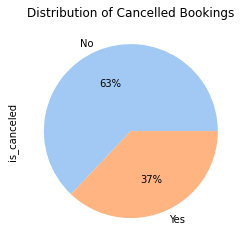

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
palette_color = sns.color_palette('pastel')
df['is_canceled'].value_counts().plot(kind='pie',colors=palette_color,labels=['No','Yes'], autopct = '%0.0f%%')
plt.title('Distribution of Cancelled Bookings')
plt.show()

The data seems already cleaned and organised. Not much cleaning needed.

<h2>2. Finding Relationships (EDA) </h2>

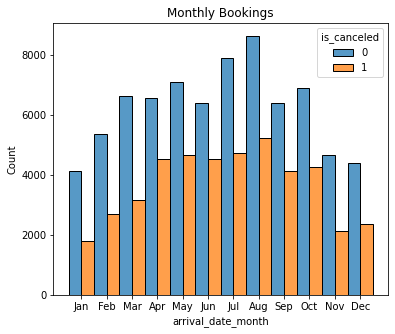

In [143]:
#Which month has the highest bookings?
fig, ax = plt.subplots(figsize=(6,5))
plt.title('Monthly Bookings')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
#sns.histplot(df['arrival_date_month'],kde=True)
sns.histplot(data=df, x="arrival_date_month", hue="is_canceled",multiple="dodge",binwidth=0.5,discrete=True)
plt.show()

There is seems to be a consistent proportion of cancellations across months.

Also, summer months have the highest bookings.

Any relationship between lead time and cancellation?

In [144]:
df['lead_time'].nunique()
#too many for a category

479

We willl categorise the lead time and see if there is a relationship

In [145]:
#function to categorise lead time
def lead_time(x):
    if x < 2: 
        return '1day'
    elif x >= 2 and x < 8:
        return '1week'
    elif x >= 8 and x <15:
        return '2weeks'
    elif x >= 15 and x < 32:
        return '1month'
    elif x >= 32 and x < 185:
        return '6months'
    elif x >= 185 and x < 365:
        return '1year'
    else: return '1yearplus'



df_cancelled = df[['lead_time','is_canceled']]
df_cancelled['lead_time_frame'] = df['lead_time'].apply(lambda x: lead_time(x))

In [146]:
#cancelled is a subset
df_cancelled.head()

,lead_time,is_canceled,lead_time_frame
0,342,0,1year
1,737,0,1yearplus
2,7,0,1week
3,13,0,2weeks
4,14,0,2weeks


In [147]:
#grouping to make it easy for visual analysis
df_cancelled_grouped = df_cancelled.groupby(['is_canceled','lead_time_frame'])['lead_time'].count().unstack('is_canceled')

In [148]:
#easier to plot and manipulate a dataframe
#let us calculate probability manually
#please if there are easier ways let me know
leadtime_probability = pd.DataFrame(df_cancelled_grouped[1]/(df_cancelled_grouped[1]+df_cancelled_grouped[0]))

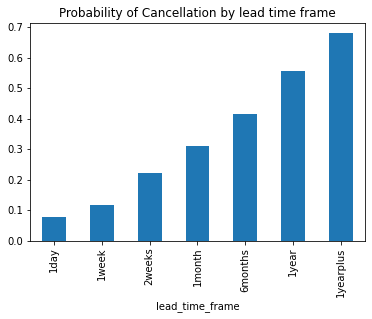

In [149]:
leadtime_probability.reindex(['1day','1week','2weeks','1month','6months','1year','1yearplus']).plot(kind='bar',legend=None)

plt.title('Probability of Cancellation by lead time frame')
plt.show()

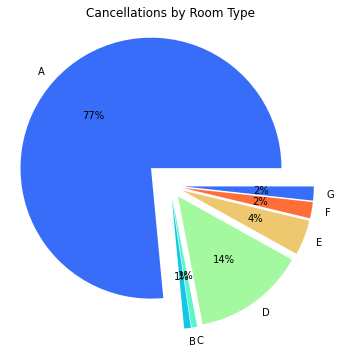

In [150]:
#Let us see if the room type affects cancellation.
#reserved_room_type_A

#subset to only cancelled bookings

df_cancelled = df[df['is_canceled']==1]

def get_sum(x):
    room_type = 'reserved_room_type_'+x
    number_cancelled = df_cancelled[room_type].sum()
    return number_cancelled


rooms = ['A','B','C','D','E','F','G']

numbers = []
for room in rooms:
 numbers.append(get_sum(room))




#cancelled_rooms = pd.DataFrame((zip(rooms,numbers)))

#pie chart
explode = [0.2, 0.1, 0.1, 0.1, 0.1,0.1,0.1]
fig,ax= plt.subplots(figsize=(6,6))
ax.set_title('Cancellations by Room Type')
color1 = sns.color_palette("rainbow")
plt.pie(numbers, labels=rooms,  autopct='%.0f%%',explode=explode,colors=color1)

plt.show()





Room type A, clearly has the highest cancellation.

Do agent or company bookings have higher cancellations?

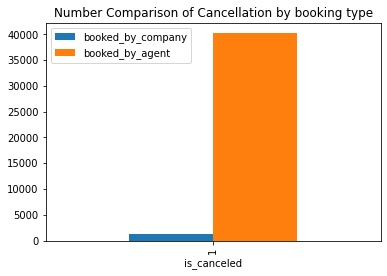

In [151]:
#what is the number of cancelations by booking type, agent or company booked?

df_cancelled.groupby('is_canceled')[['booked_by_company','booked_by_agent']].sum().plot(kind='bar')
plt.title('Number Comparison of Cancellation by booking type')
plt.show()

Rooms booked by agents have more cancellations. 

This is also indicative of the probability as the two events are mutually exlusive.

Are parents more likely to cancel than single people or couples?

In [152]:
#We will assume bookings that equal 1 adult is single, bookings with only two adults a couple and those with children or babies as families.

df_cancelled['population'] = df_cancelled['adults'] + df_cancelled['children'] + df_cancelled['babies'] # cancelled number
df['population'] = df['adults'] + df['children'] + df['babies'] #total number
df_cancelled['population'].head()
df['population'].head()

0    2.0
1    2.0
2    1.0
3    1.0
4    2.0
Name: population, dtype: float64

In [153]:
#function to categorise guests
def guest_define(x):
    if x[0] == 1: 
        return 'single'
    elif x[0] == 2 and x[1] == 2:
        return 'couple'
    elif x[0] > 2 and x[1] > 2:
        return 'group'
    elif x[0] > 1 and x[1] == 1:
        return 'single_parent'
    else: return 'family'


#get a tuple of population and adults to make sure they are not couples
df_cancelled['guest'] = df_cancelled[['population','adults']].apply(lambda x: guest_define(x),axis=1)


#get the total guest types to calculate the probabilities

df['guest'] = df[['population','adults']].apply(lambda x: guest_define(x),axis=1)




In [154]:
 # probability of cancellation by guest type, cancelled divided by total
print(df_cancelled['guest'].value_counts()/df['guest'].value_counts())
df_guest = pd.DataFrame(df_cancelled['guest'].value_counts()/df['guest'].value_counts())

couple           0.397526
single           0.290288
family           0.350234
group            0.347508
single_parent    0.264444
Name: guest, dtype: float64


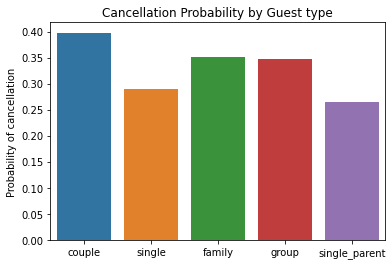

In [155]:
sns.barplot(x=df_guest.index,y=df_guest['guest'])
plt.ylabel('Probability of cancellation')
plt.title('Cancellation Probability by Guest type')
plt.show()

Not much variation in the probability of cancelation by guest type. But couples have the highest tendency to cancel.

The way the data has been structured leans more toward machine learning and prediction. At this point I would halt the analysis as the data has already been clean and engineered.

<h2>3.Conclusion</h2>

With data already engineered, raw analysis is a challenge as the data was engineered to fit into a particular pipeline.

<strong>But we can tell that room type A, couples and long lead times have the highest cancellations.</strong>